<a href="https://colab.research.google.com/github/Carnage203/ML/blob/main/Wine_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('wine-clustering.csv')
df['Alcohol'] = df['Alcohol'].astype(int)
df['Malic_Acid'] = df['Malic_Acid'].astype(int)
df['Ash'] = df['Ash'].astype(int)
df['Ash_Alcanity'] = df['Ash_Alcanity'].astype(int)
df['Magnesium'] = df['Magnesium'].astype(int)
df['Total_Phenols'] = df['Total_Phenols'].astype(int)
df['Nonflavanoid_Phenols'] = df['Nonflavanoid_Phenols'].astype(int)
df['Proanthocyanins'] = df['Proanthocyanins'].astype(int)
df['Color_Intensity'] = df['Color_Intensity'].astype(int)
df['Hue'] = df['Hue'].astype(int)
df['OD280'] = df['OD280'].astype(int)
df['Proline'] = df['Proline'].astype(int)

df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14,1,2,15,127,2,3.06,0,2,5,1,3,1065
1,13,1,2,11,100,2,2.76,0,1,4,1,3,1050
2,13,2,2,18,101,2,3.24,0,2,5,1,3,1185
3,14,1,2,16,113,3,3.49,0,2,7,0,3,1480
4,13,2,2,21,118,2,2.69,0,1,4,1,2,735
5,14,1,2,15,112,3,3.39,0,1,6,1,2,1450
6,14,1,2,14,96,2,2.52,0,1,5,1,3,1290
7,14,2,2,17,121,2,2.51,0,1,5,1,3,1295
8,14,1,2,14,97,2,2.98,0,1,5,1,2,1045
9,13,1,2,16,98,2,3.15,0,1,7,1,3,1045


In [ ]:
df.isnull()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False,False,False,False,False,False
176,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['Nonflavanoid_Phenols'].value_counts()

Nonflavanoid_Phenols
0    178
Name: count, dtype: int64

In [ ]:
df=df.drop(columns=['Nonflavanoid_Phenols'])

In [ ]:
df['Alcohol'].value_counts()

Alcohol
13    70
12    67
14    22
11    19
Name: count, dtype: int64

In [ ]:
df['Malic_Acid'].value_counts()

Malic_Acid
1    92
2    31
3    30
4    12
0     8
5     5
Name: count, dtype: int64

In [ ]:
df['Ash'].value_counts()

Ash
2    159
1     17
3      2
Name: count, dtype: int64

In [ ]:
corr_matrix=df.corr()
print(corr_matrix)

                  Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol          1.000000    0.045030  0.190278     -0.326641   0.243299   
Malic_Acid       0.045030    1.000000  0.180117      0.337174  -0.076367   
Ash              0.190278    0.180117  1.000000      0.283838   0.156359   
Ash_Alcanity    -0.326641    0.337174  0.283838      1.000000  -0.083089   
Magnesium        0.243299   -0.076367  0.156359     -0.083089   1.000000   
Total_Phenols    0.237795   -0.360815  0.120646     -0.292987   0.177134   
Flavanoids       0.243862   -0.426779  0.122738     -0.353760   0.195784   
Proanthocyanins  0.187162   -0.195538 -0.060444     -0.174353   0.224786   
Color_Intensity  0.504041    0.237571  0.255930      0.022157   0.214488   
Hue              0.135852   -0.530836 -0.139802     -0.358084   0.063772   
OD280            0.027995   -0.328457 -0.029528     -0.231728   0.058330   
Proline          0.615783   -0.227283  0.199524     -0.447579   0.393351   

           

<Axes: >

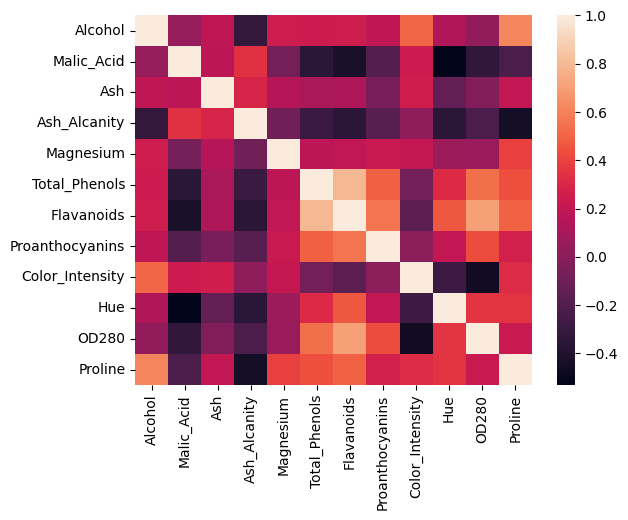

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
df=df.drop(columns=['Malic_Acid','Ash_Alcanity'])

In [ ]:
corr_matrix=df.corr()
print(corr_matrix)

                  Alcohol       Ash  Magnesium  Total_Phenols  Flavanoids  \
Alcohol          1.000000  0.190278   0.243299       0.237795    0.243862   
Ash              0.190278  1.000000   0.156359       0.120646    0.122738   
Magnesium        0.243299  0.156359   1.000000       0.177134    0.195784   
Total_Phenols    0.237795  0.120646   0.177134       1.000000    0.793143   
Flavanoids       0.243862  0.122738   0.195784       0.793143    1.000000   
Proanthocyanins  0.187162 -0.060444   0.224786       0.491549    0.553938   
Color_Intensity  0.504041  0.255930   0.214488      -0.081266   -0.162925   
Hue              0.135852 -0.139802   0.063772       0.311069    0.467203   
OD280            0.027995 -0.029528   0.058330       0.534641    0.703754   
Proline          0.615783  0.199524   0.393351       0.432647    0.494193   

                 Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                 0.187162         0.504041  0.135852  0.027995   
Ash   

<Axes: >

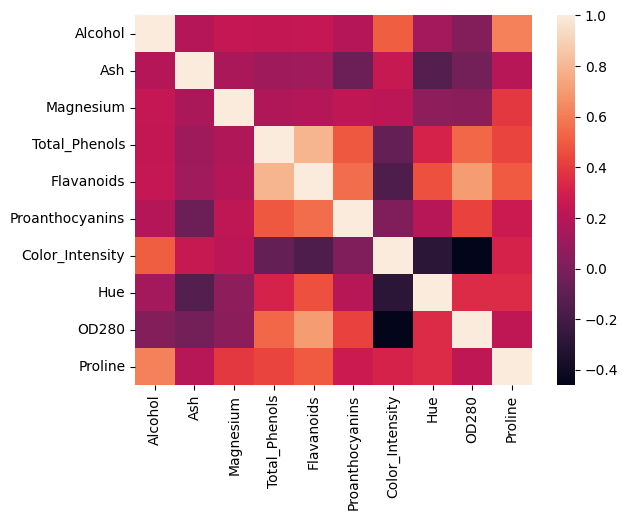

In [ ]:
sns.heatmap(corr_matrix)

In [ ]:
df.head(6)

,Alcohol,Ash,Magnesium,Total_Phenols,Flavanoids,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14,2,127,2,3.06,2,5,1,3,1065
1,13,2,100,2,2.76,1,4,1,3,1050
2,13,2,101,2,3.24,2,5,1,3,1185
3,14,2,113,3,3.49,2,7,0,3,1480
4,13,2,118,2,2.69,1,4,1,2,735
5,14,2,112,3,3.39,1,6,1,2,1450


<Axes: xlabel='Magnesium', ylabel='Proline'>

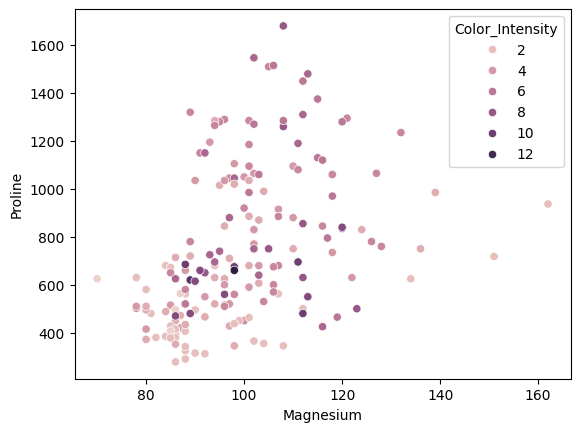

In [ ]:
sns.scatterplot(data=df,x='Magnesium',y='Proline',hue='Color_Intensity')

<Axes: xlabel='Alcohol', ylabel='Color_Intensity'>

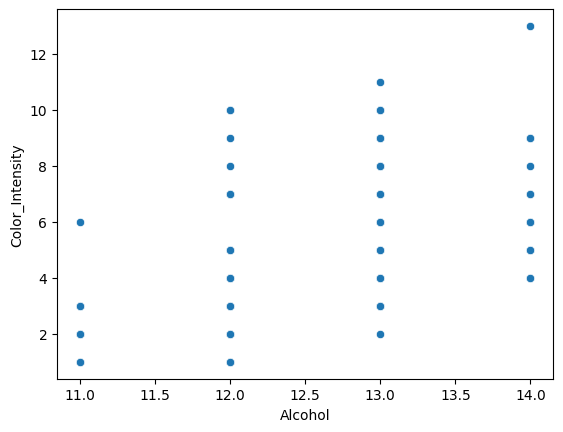

In [ ]:
sns.scatterplot(data=df,x='Alcohol',y='Color_Intensity')

<Axes: xlabel='Alcohol', ylabel='Magnesium'>

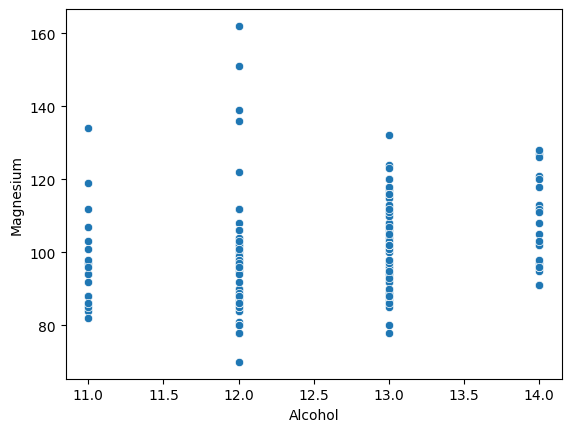

In [ ]:
sns.scatterplot(data=df,x='Alcohol',y='Magnesium')

<Axes: xlabel='Ash', ylabel='Magnesium'>

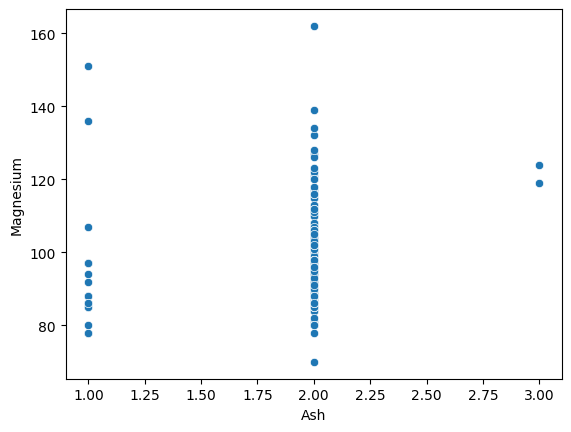

In [ ]:
sns.scatterplot(data=df,x='Ash',y='Magnesium')

<Axes: xlabel='Alcohol', ylabel='Proline'>

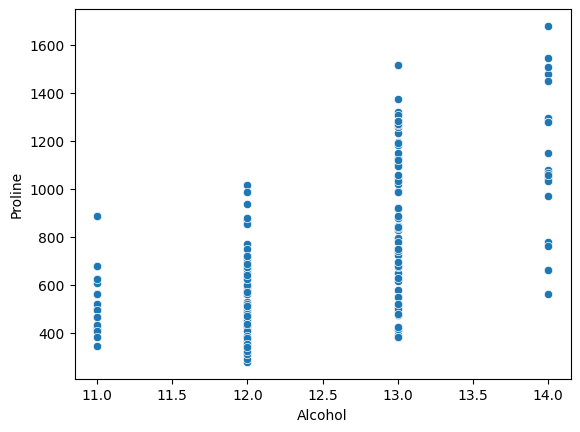

In [ ]:
sns.scatterplot(data=df,x='Alcohol',y='Proline')

<Axes: xlabel='Magnesium', ylabel='Proline'>

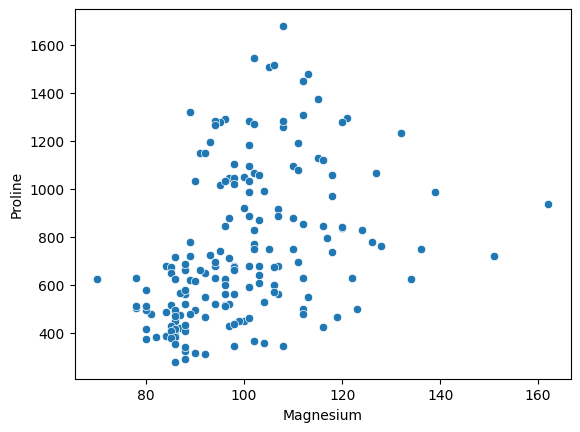

In [ ]:
sns.scatterplot(data=df,x='Magnesium',y='Proline')

<Axes: xlabel='Magnesium', ylabel='Flavanoids'>

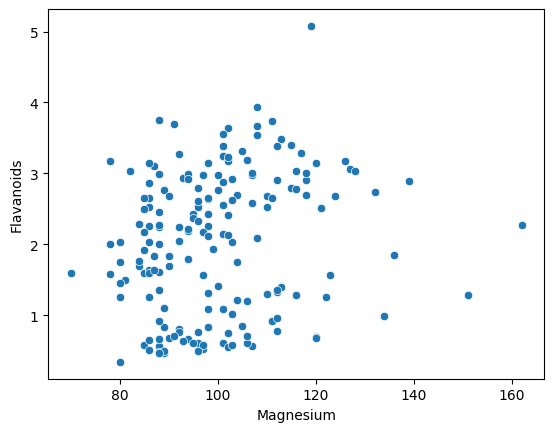

In [ ]:
sns.scatterplot(data=df,x='Magnesium',y='Flavanoids')

<Axes: xlabel='Proline', ylabel='Flavanoids'>

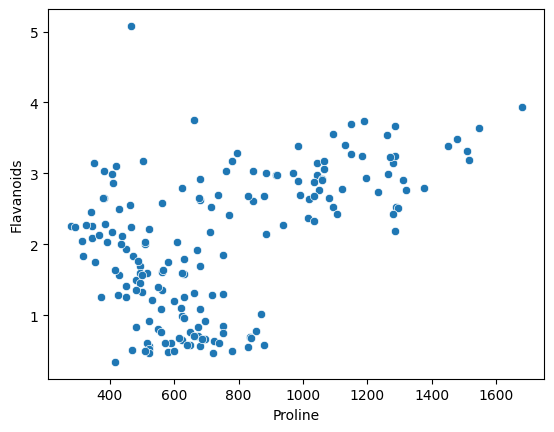

In [ ]:
sns.scatterplot(data=df,x='Proline',y='Flavanoids')

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sse=[]
k_range=range(1,10)
print(k_range)
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['Magnesium','Color_Intensity','Proline']])
  sse.append(km.inertia_)

range(1, 10)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

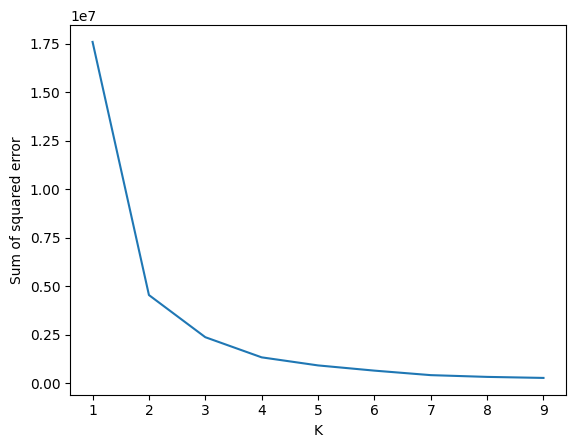

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [ ]:
km=KMeans(n_clusters=4)
y_hat=km.fit_predict(df[['Magnesium','Color_Intensity','Proline']])
y_hat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 0, 0,
       1, 1, 1, 0, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 1, 1, 1, 3, 3, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0], dtype=int32)

In [ ]:
df['Cluster']=y_hat
df.head()

,Alcohol,Ash,Magnesium,Total_Phenols,Flavanoids,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14,2,127,2,3.06,2,5,1,3,1065,1
1,13,2,100,2,2.76,1,4,1,3,1050,1
2,13,2,101,2,3.24,2,5,1,3,1185,3
3,14,2,113,3,3.49,2,7,0,3,1480,3
4,13,2,118,2,2.69,1,4,1,2,735,0


In [ ]:
km.cluster_centers_

array([[ 100.18644068,    4.93220339,  668.71186441],
       [ 107.35135135,    4.89189189,  994.        ],
       [  92.08474576,    3.55932203,  439.45762712],
       [ 106.        ,    5.73913043, 1338.56521739]])

In [ ]:
from mpl_toolkits import mplot3d

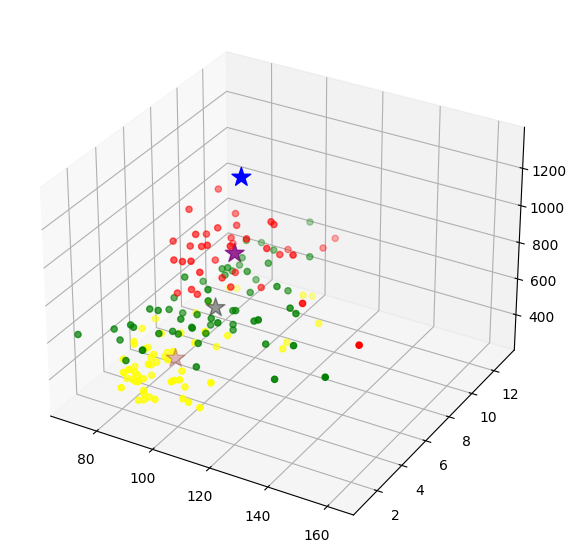

In [ ]:
dt1=df[df.Cluster==0]
dt2=df[df.Cluster==1]
dt3=df[df.Cluster==2]
x_centers = km.cluster_centers_[:, 0]
y_centers = km.cluster_centers_[:, 1]
z_centers = km.cluster_centers_[:, 2]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(dt1['Magnesium'], dt1['Color_Intensity'], dt1['Proline'], color = "green")
ax.scatter3D(dt2['Magnesium'], dt2['Color_Intensity'], dt2['Proline'], color = "red")
ax.scatter3D(dt3['Magnesium'], dt3['Color_Intensity'], dt3['Proline'], color = "yellow")
ax.scatter3D(xs=x_centers , ys=y_centers, zs=z_centers,color=['black','purple','brown','blue'],marker='*',s=200,label='centroid')
plt.show()

In [ ]:
df['Cluster'].value_counts()

Cluster
0    59
2    59
1    37
3    23
Name: count, dtype: int64

In [ ]:
for i in range(0,max(df.Cluster)+1):
  new_df=df[df['Cluster']==i]
  print(new_df)
  filename='new'+str(i)+'.csv'
  new_df.to_csv(filename)

     Alcohol  Ash  Magnesium  Total_Phenols  Flavanoids  Proanthocyanins  \
4         13    2        118              2        2.69                1   
20        14    2        126              3        3.17                2   
21        12    2        102              2        2.41                1   
25        13    3        124              2        2.68                1   
39        14    2        128              3        3.04                2   
40        13    2        117              3        3.29                2   
43        13    2        103              2        2.63                1   
60        12    2        101              2        1.09                0   
62        13    1         94              2        1.79                0   
65        12    2         98              2        2.65                2   
68        13    2        110              2        1.30                0   
69        12    1        151              1        1.28                2   
78        12